In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%%capture
# Clone the QE git
!git clone https://github.com/QEF/q-e.git
# Install the dependencies
!apt-get install -y libfftw3-3 libfftw3-dev libfftw3-doc
# enter the q-e folder
%cd q-e
# run the configure file
# !DFLAGS='-D__OPENMP -D__FFTW3 -D__MPI -D__SCALAPACK' FFT_LIBS='-lfftw3'  ./configure --enable-openmp
!!DFLAGS='-D__FFTW3 ' FFT_LIBS='-lfftw3'  ./configure
# computation time ~1 minute

In [3]:
%%capture
!make pw #computation time ~5-8 minutes

In [4]:
!pwd

/content/q-e


In [5]:
!ls

archive		 COUPLE			external  KCW	      make.inc	PW	       upflib
atomic		 CPV			FFTXlib   KS_Solvers  MBD	PWCOND	       UtilXlib
bin		 dev-tools		GUI	  LAXlib      Modules	QEHeat	       XClib
cmake		 dft-d3			GWW	  License     NEB	README_GPU.md  XSpectra
CMakeLists.txt	 Doc			HP	  logo.jpg    PHonon	README.md
configure	 environment_variables	include   LR_Modules  PP	TDDFPT
CONTRIBUTING.md  EPW			install   Makefile    pseudo	test-suite


In [27]:
%cd ..

/content


In [7]:
!pwd

/content


In [29]:
# creé un dossier silicon
!mkdir graphene

In [32]:
%cd /content/graphene/

/content/graphene


In [34]:
!ls

C.pbe-n-kjpaw_psl.1.0.0.UPF  gr.scf.in


**SCF (Self-Consistent Field) calculation**
---
---




In [ ]:
qe_input = """
&control
  prefix='gr',
  ! this is a comment: you can comment out variables
  ! set pseudo_dir and outdir to suitable directories
  pseudo_dir = '/content/graphene/',
  outdir='/content/graphene/'
/
&system
  ibrav = 4,
    celldm(1) = 4.65, ! a = 2.46 Å
    celldm(3) = 10.0, ! Vacuum spacing along z
    nat = 2,
    ntyp = 1,
    ecutwfc = 30.0,
    ecutrho = 320.0
/
&electrons
conv_thr = 1.0d-8
/
ATOMIC_SPECIES
    C 12.0107 C.pbe-n-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS crystal
    C 0.000000 0.000000 0.000000
    C 0.333333 0.666667 0.000000
K_POINTS automatic
    6 6 1 0 0 0
"""

# We write the input script
with open("gr.scf.in", "w") as f:
    f.write(qe_input)

In [36]:
! /content/q-e/bin/pw.x  -in gr.scf.in > gr.scf.out

In [38]:
!ls

C.pbe-n-kjpaw_psl.1.0.0.UPF  gr.save  gr.scf.in  gr.scf.out  gr.xml


In [39]:
!cat gr.scf.out


     Program PWSCF v.7.4 starts on 15Jan2025 at 14: 1:55 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     4638 MiB available memory on the printing compute node when the environment starts

     Reading input from gr.scf.in

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  4
     file C.pbe-n-kjpaw_psl.1.0.0.UPF: wavefunction(s)  2S 2P renormalized


     G-v

In [40]:
!grep -e "total energy" -e estimate gr.scf.out

     total energy              =     -36.84090301 Ry
     estimated scf accuracy    <       0.19150536 Ry
     total energy              =     -36.86727478 Ry
     estimated scf accuracy    <       0.00228287 Ry
     total energy              =     -36.86747287 Ry
     estimated scf accuracy    <       0.00016901 Ry
     total energy              =     -36.86749740 Ry
     estimated scf accuracy    <       0.00000092 Ry
     total energy              =     -36.86749933 Ry
     estimated scf accuracy    <       0.00000009 Ry
!    total energy              =     -36.86749934 Ry
     estimated scf accuracy    <          7.6E-10 Ry
     The total energy is the sum of the following terms:


**# Install ASE for visualisation**
---
---

In [44]:
# instaler ase pour visualisation de structure sur google colab
!apt install ase #computation time ~30 seconds
# or by !pip install ase


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ase is already the newest version (3.22.1-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [47]:
import ase.io.espresso
from ase import Atoms
from ase.visualize import view
input_file = ase.io.espresso.read_espresso_in('gr.scf.in')

atoms = Atoms(input_file)
view(atoms,viewer='x3d')

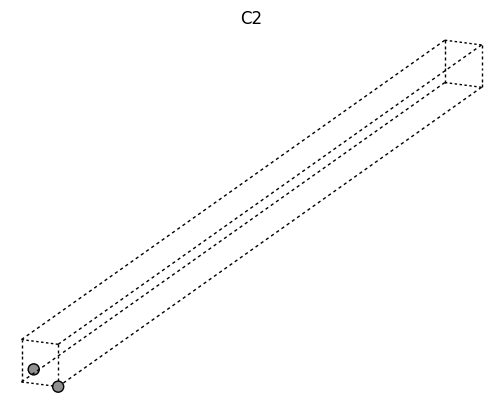

In [48]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig, ax = plt.subplots()
plot_atoms(atoms, ax, radii=0.3, rotation=('45x,45y,90z'))
ax.set_title(atoms.get_chemical_formula())
ax.set_axis_off()
plt.show()

In [21]:
# copie q-e directory to my Drive space
!cp -r /content/q-e /content/drive/MyDrive/


In [22]:
# # copie graphene directory to my Drive space
!cp -r /content/graphene /content/drive/MyDrive/